In [1]:
#Importamos la libreria pandas
import pandas as pd 
#Importamos la libreria seaborn
import seaborn as sns
#Importamos la libreria numpy
import numpy as np
#Importamos LabelEncoder desde la libreria sklearn
from sklearn.preprocessing import LabelEncoder
#Importamos train_test_split desde la libreria sklearn
from sklearn.model_selection import train_test_split
#Importamos MinMaxScaler desde la libreria sklearn
from sklearn.preprocessing import MinMaxScaler
#Importamos la libreria matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#Importamos GaussianNB desde la libreria sklearn
from sklearn.naive_bayes import GaussianNB
#Importamos Metric desde la libreria sklearn
from sklearn import metrics
#Importamos la libreria collections
import collections
#Importamos hiden markov model desde la libreria hmmlearn
from hmmlearn import hmm
#Importamos confusion_matrix desde la libreria sklearn
from sklearn.metrics import confusion_matrix
# Importamos acurracy_score desde la libreria sklearn
from sklearn.metrics import accuracy_score
#Importamos recall_score desde la libreria sklearn
from sklearn.metrics import recall_score
#Importamos precision_score desde la libreria sklearn
from sklearn.metrics import precision_score
#Importamos f1_score desde la libreria sklearn
from sklearn.metrics import f1_score
#Importamos StandardScaler de la libreria sklearn
from sklearn.preprocessing import StandardScaler
#Importamos la libreria skfuzzy
import skfuzzy as fuzz
#Importamos control de la libreria skfuzzy
from skfuzzy import control as ctrl
#Importamos FCM de la libreria fcmeans
from fcmeans import FCM
#IMpoeramos GridSearchCV desde la libreria sklearn
from sklearn.model_selection import GridSearchCV

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Establecemos el enlace de conexión del dataset
url = 'https://raw.githubusercontent.com/sfbarragan/AlgoritmosProbabilisticos/master/neo.csv'
# Cargamos el dataset
df = pd.read_csv(url)
# Mostramos los datos del dataset
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


# Descripción del dataset

El dataset contiene información de mas de 90000 asteroides. Dicho dataset contiene 10 atributos, incluida una característica de clase (objetivo) que indica si el asteroide es o no peligroso (True/False). El significado comercial de cada columna (atributo) en los datos es el siguiente:

**Variable objetivo**<br>
hazardous: Clasificación del asteroide como peligroso o no (True/False).<br>

**Variables de entrada**<br>
id: Identificador único de cada asteroide <br>
name: Nombre del asteroide dado por la NASA<br>
est_diameter_min: Diámetro mínimo estimado en kilómetros<br>
est_diameter_max: Diámetro Máximo Estimado en Kilómetros<br>
relative_velocity: Velocidad relativa a la Tierra<br>
miss_distance: Distancia en Kilómetros perdidos<br>
orbiting_body: Planeta que órbita el asteroide<br>
sentry_object: Sistema automatizado de monitoreo de colisiones<br>
absolute_magnitude: Describe la luminosidad intrínseca<br>


# Problema a resolver

Este dataset contiene varios parámetros/características según los cuales un asteroide en particular que ya está clasificado como el objeto más cercano a la Tierra. En base a dichos parámetros se desea predecir si el asteroide puede o no ser peligroso.

Como conocemos que no podemos procesar esa cantidad de datos, hemos optado por realizar un sampling de los datos tomado como muestra un total de 2500 datos para entrenar el modelo. Donde la variable objetivo se denomina hazardous. Existen 9 variables de entrada llamadas: id, name, est_diameter_min, est_diameter_max, relative_velocity, miss_distance, orbiting_body, sentry_object y absolute_magnitude.

In [227]:
# Obtenemos una muestra del dataset
data_muestra = df.sample(n=2500)
# Mostramos los datos de la muestra
data_muestra.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
60738,3653535,(2013 VL5),0.014607,0.032662,35313.530412,2.625727e+06,Earth,False,26.30,False
75380,54132514,(2021 FW2),0.023044,0.051528,36339.122096,1.339492e+07,Earth,False,25.31,False
6353,54243725,(2022 BZ5),0.295498,0.660754,100967.217207,6.655847e+07,Earth,False,19.77,False
23175,3404763,(2008 ER),0.146068,0.326618,28531.563510,6.190662e+07,Earth,False,21.30,False
59337,3428698,(2008 TD),0.022108,0.049436,24580.777128,2.106743e+07,Earth,False,25.40,False


In [228]:
# Contamos los registros del dataset
data_muestra.count()

id                    2500
name                  2500
est_diameter_min      2500
est_diameter_max      2500
relative_velocity     2500
miss_distance         2500
orbiting_body         2500
sentry_object         2500
absolute_magnitude    2500
hazardous             2500
dtype: int64

# Estadisticas generales


In [229]:
#Se hace una descripcion para ver como esta conformado el dataset 
data_muestra.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,2.500000e+03,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000
mean,1.480235e+07,0.130599,0.292028,47825.006553,3.663090e+07,23.560662
std,2.116927e+07,0.253468,0.566771,25348.771627,2.223341e+07,2.912216
min,2.001620e+06,0.000609,0.001362,1700.205468,1.263816e+04,14.600000
25%,3.430474e+06,0.018969,0.042417,28339.409509,1.667226e+07,21.500000
50%,3.748528e+06,0.044520,0.099550,43857.306033,3.768237e+07,23.880000
75%,3.892849e+06,0.133216,0.297879,62811.397217,5.591922e+07,25.732500
max,5.427276e+07,3.195619,7.145621,154650.560241,7.479655e+07,33.200000


# Describir resultados estadísticos


Podemos observar una descripción general de los datos de muestra del dataset, observamos la media, varinza, valores minimos y valores maximos. Esto nos da un idea de como esta organizada la data del dataset.

# Descripción de la data


In [230]:
# Mostramos la estructura de los atributos del dataset
data_muestra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 60738 to 90178
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2500 non-null   int64  
 1   name                2500 non-null   object 
 2   est_diameter_min    2500 non-null   float64
 3   est_diameter_max    2500 non-null   float64
 4   relative_velocity   2500 non-null   float64
 5   miss_distance       2500 non-null   float64
 6   orbiting_body       2500 non-null   object 
 7   sentry_object       2500 non-null   bool   
 8   absolute_magnitude  2500 non-null   float64
 9   hazardous           2500 non-null   bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 180.7+ KB


# Limpieza del dataset

In [231]:
#Verificamos la existencia de datos nulos
data_muestra.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [232]:
#Verificamos la existencia  de datos vacios (longitud = 0)
data_muestra.isna().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

# Selección de caracteristicas

In [233]:
# Obtenemos la correlación entre las varibales
corr_df = data_muestra.corr()
# Imprimimos un mensaje informativo
print("La correlación del DataFrame es:")
# Imprimimos la correlación
print(corr_df, "\n")

La correlación del DataFrame es:
                          id  est_diameter_min  est_diameter_max  \
id                  1.000000         -0.189625         -0.189625   
est_diameter_min   -0.189625          1.000000          1.000000   
est_diameter_max   -0.189625          1.000000          1.000000   
relative_velocity  -0.081204          0.323451          0.323451   
miss_distance      -0.103460          0.170238          0.170238   
sentry_object            NaN               NaN               NaN   
absolute_magnitude  0.288689         -0.700083         -0.700083   
hazardous          -0.125689          0.238988          0.238988   

                    relative_velocity  miss_distance  sentry_object  \
id                          -0.081204      -0.103460            NaN   
est_diameter_min             0.323451       0.170238            NaN   
est_diameter_max             0.323451       0.170238            NaN   
relative_velocity            1.000000       0.327185            NaN   

In [234]:
#Eliminamos las columnas que no utilizaremos
data_muestra = data_muestra.drop(columns=['id','name', 'orbiting_body', 'sentry_object'])

# Resultados de la limpieza
El dataset no registra datos nulos, por lo cual no requiere aplicarse una limpieza sobre el mismo, lo unico que haremos es retirar las columnas que no seran utiles para el entrenamiento de los modelos. Las columnas afectadas seran id y nombre, orbiting_body, sentry_object.

# Transformación de datos categoricos


In [235]:
# Encontramos los valores unicos para identificar aquellos que son categoricos y los que son continuos
data_muestra.nunique()

est_diameter_min       622
est_diameter_max       622
relative_velocity     2500
miss_distance         2498
absolute_magnitude     622
hazardous                2
dtype: int64

In [236]:
#Creamnos la instancia de labelencoder
labelencoder = LabelEncoder()

#Asignamos los valores numericos a seller_type y los almacenamos en otra columnna
data_muestra["hazardous"] = labelencoder.fit_transform(data_muestra["hazardous"])

# Mostramos las nuevas columnas
data_muestra.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
60738,0.014607,0.032662,35313.530412,2.625727e+06,26.30,0
75380,0.023044,0.051528,36339.122096,1.339492e+07,25.31,0
6353,0.295498,0.660754,100967.217207,6.655847e+07,19.77,0
23175,0.146068,0.326618,28531.563510,6.190662e+07,21.30,0
59337,0.022108,0.049436,24580.777128,2.106743e+07,25.40,0


# Correlación entre los atributos

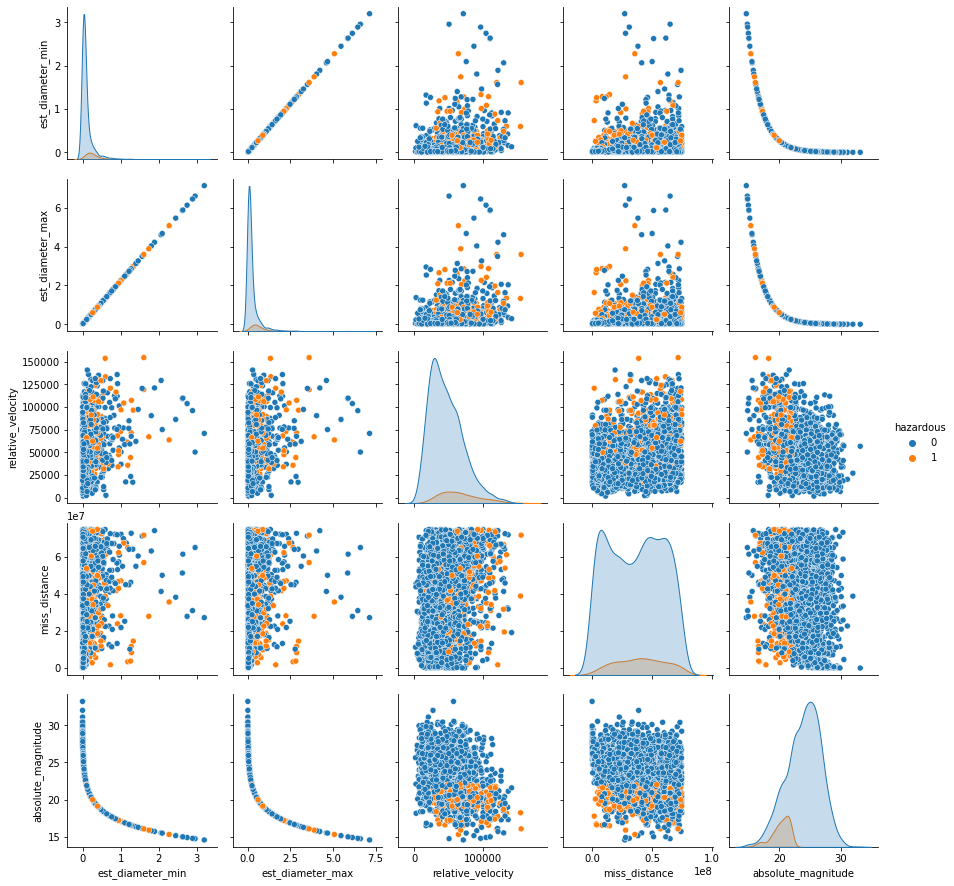

In [237]:
#Exolorar la relacion estre las variables
sns.pairplot(data_muestra,hue='hazardous')

Con la ejecución del código anterior, logramos apreciar en diferentes graficas la relación existente entre cada una de las variables de entrada.

# Preprocesamiento de datos

In [238]:
# Separamos los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data_muestra.drop('hazardous', axis=1),
                                                    data_muestra['hazardous'],
                                                    test_size=0.2,
                                                    random_state=0)

X_train.shape, X_test.shape

((2000, 5), (500, 5))

# Min-Max Scaler

Utilizaremos el metodo MinMaxScaler(), para reducir la dispersión de los datos de las variables independientes para el modelo de Naive Bayes.

In [239]:
# Instanciamos el scalar
scaler = MinMaxScaler()

# Entrenamos el modelo con los datos de entrenamiento
scaler.fit(X_train)

# Transformamos los datos de entrenamiento
X_train_scaled = scaler.transform(X_train)
# Transformamos los datos de prueba
X_test_scaled = scaler.transform(X_test)

In [240]:
# Transformamos la matriz de entrenamiento NumPy devuelta 
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# Transformamos la matriz de prueba NumPy devuelta 
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [241]:
# Observamos una estadistica general de los datos de entrenamiento
X_train.describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000
mean,0.128772,0.287944,47550.006672,3.664592e+07,23.610584
std,0.248115,0.554802,25593.699452,2.243136e+07,2.928110
min,0.000609,0.001362,1700.205468,1.263816e+04,14.600000
25%,0.018389,0.041119,27874.742373,1.583876e+07,21.500000
50%,0.044112,0.098637,43116.772793,3.788592e+07,23.900000
75%,0.133216,0.297879,62586.264370,5.625110e+07,25.800000
max,3.195619,7.145621,154650.560241,7.479655e+07,33.200000


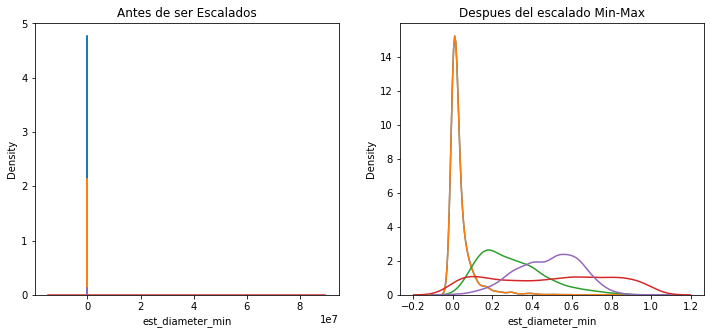

In [242]:
# Asignaremos la escala de la figura
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Creamos el grafico antes de ser escalado
# Asignamos un titulo al grafico
ax1.set_title('Antes de ser Escalados')
# Elegimos los datos a graficar
sns.kdeplot(X_train['est_diameter_min'], ax=ax1)
# Elegimos los datos a graficar
sns.kdeplot(X_train['est_diameter_max'], ax=ax1)
# Elegimos los datos a graficar
sns.kdeplot(X_train['relative_velocity'], ax=ax1)
# Elegimos los datos a graficar
sns.kdeplot(X_train['miss_distance'], ax=ax1)
# Elegimos los datos a graficar
sns.kdeplot(X_train['absolute_magnitude'], ax=ax1)

# Creamos el grafico despues normalización media
# Asignamos un titulo al grafico
ax2.set_title('Despues del escalado Min-Max')
# Elegimos los datos a graficar
sns.kdeplot(X_train_scaled['est_diameter_min'], ax=ax2)
# Elegimos los datos a graficar
sns.kdeplot(X_train_scaled['est_diameter_max'], ax=ax2)
# Elegimos los datos a graficar
sns.kdeplot(X_train_scaled['relative_velocity'], ax=ax2)
# Elegimos los datos a graficar
sns.kdeplot(X_train_scaled['miss_distance'], ax=ax2)
# Elegimos los datos a graficar
sns.kdeplot(X_train_scaled['absolute_magnitude'], ax=ax2)


# Mostramos las graficas
plt.show()

# Resultados de la normalización
Podemos observar como los datos se han normalizado, ubicandose en un rango entre -1 y 1. De esta manera facilitamos el entrenamiento de los modelos predicción probabilisticos.

# Naive Bayes

In [243]:
# Instanciamos el algoritmo gauciano de Naive Bayes
gnb = GaussianNB()

In [244]:
# Alimentamos nuestro modelo con los datos de entrenamiento
# y obtenemos la predicción
y_pred_NB = gnb.fit(X_train_scaled, y_train.values.ravel()).predict(X_test)

In [245]:
# Mostramos el accuracy del modelo Naive Bayes
print("Accuracy Naive Bayes:", metrics.accuracy_score(y_test, y_pred_NB))

Accuracy Naive Bayes: 0.898


# Matriz de confusión (Naive Bayes)

In [246]:
#Creamos la matriz de confusión
print(confusion_matrix(y_test, y_pred_NB))

[[449   0]
 [ 51   0]]


<AxesSubplot:>

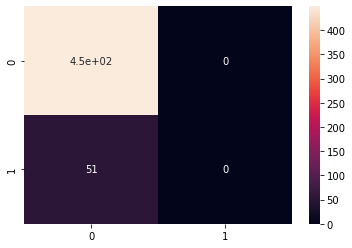

In [247]:
# Presentamos de forma estetica la matriz de confución
sns.heatmap(confusion_matrix(y_test, y_pred_NB), annot=True)

In [248]:
# Obtenemos el accuracy del modelo Naive Bayes
NB_accuracy_score = accuracy_score(y_test, y_pred_NB)

# Mostramos el accuracy
NB_accuracy_score

0.898

In [249]:
# Obtenemos el recall del modelo Naive Bayes
NB_recall_score = recall_score(y_test, y_pred_NB, average=None)

# Mostramos la exahustividad
NB_recall_score

array([1., 0.])

In [250]:
# Obtenemos la precisión del modelo Naive Bayes
NB_precision_score = precision_score(y_test, y_pred_NB, average=None)

# Mostramos la precisión
NB_precision_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.898, 0.   ])

In [251]:
# Obtenemos f1-score del modelo Naive Bayes
NB_f1_score = f1_score(y_test, y_pred_NB, average=None)

# Mostramos f1-score
NB_f1_score

array([0.94625922, 0.        ])

# Hidden Markov Model

In [252]:
# Instanciamos el modelo Hidden Markov Model
model = hmm.GaussianHMM(n_components = 3, covariance_type = "diag", n_iter = 50, random_state = 42)

# Entrenamos el modelo con los datos de entrenamiento
model.fit(X_train_scaled)

GaussianHMM(n_components=3, n_iter=50, random_state=42)

In [253]:
# realizamos la prueba de predicción del model
y_pred_HMM = model.predict(X_test)

In [254]:
# Mostramos el accuracy del modelo Hidden Markov Model
print("Accuracy Hidden Markov Model:", metrics.accuracy_score(y_test, y_pred_HMM))

Accuracy Hidden Markov Model: 0.898


# Matriz de confusión (Hidden Markov Model)


In [255]:
#Creamos la matriz de confusión
print(confusion_matrix(y_test, y_pred_HMM))

[[449   0]
 [ 51   0]]


<AxesSubplot:>

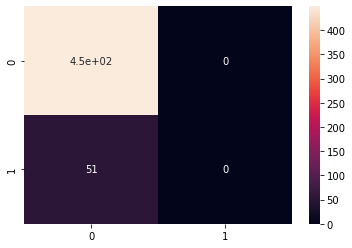

In [256]:
# Presentamos de forma estetica la matriz de confución
sns.heatmap(confusion_matrix(y_test, y_pred_HMM), annot=True)

In [257]:
# Obtenemos f1-score del modelo Hidden Markov Model
HMM_accuracy_score = accuracy_score(y_test, y_pred_HMM)

# Mostramos el accuracy
HMM_accuracy_score

0.898

In [258]:
# Obtenemos el recall del modelo Hidden Markov Model
HMM_recall_score = recall_score(y_test, y_pred_HMM, average=None)

#Imprimimos la exahustividad
HMM_recall_score

array([1., 0.])

In [259]:
# Obtenemos la precisión del modelo Hidden Markov Model
HMM_precision_score = precision_score(y_test, y_pred_HMM, average=None)
# Mostramos la precisión
HMM_precision_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.898, 0.   ])

In [260]:
# Obtenemos f1-score del modelo Hidden Markov Model
HMM_f1_score = f1_score(y_test, y_pred_HMM, average=None)
# Mostramos f1-score
HMM_f1_score

array([0.94625922, 0.        ])

# Fuzzy Logic

In [261]:
#Asignamos la variable objetivo
y = data_muestra[['hazardous']]
#Asignamos las variables caracteristicas
X = data_muestra[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']]

In [262]:
#Instanciamos el objeto escalar
x_scaler_ST = StandardScaler()

In [263]:
# Almacenamos el objeto de ajuste
x_scaler_FIT = x_scaler_ST.fit(X)

In [264]:
#Remplazamos los datos originales por los ajustados
X = x_scaler_FIT.transform(X)

In [265]:
# Asignamos la cantidad de clusters usados para el modelo
modelo_fuzzy = FCM(n_clusters=4, init= 1.7, random_state=0, fuzzifier=2)
# Entrenamos el modelo
modelo_fuzzy.fit(X)

In [266]:
#Obtenemos los centroides
centroides = modelo_fuzzy.centers
#Evaluamos el modelo
y_pred_FL = modelo_fuzzy.predict(X)

In [267]:
#Obtenemos el accuracy del modelo
accuracy_fussy = accuracy_score(y,y_pred_FL)
# Mostramos el accuracy
print("Accuracy de Fuzzy Logic:", accuracy_fussy)

Accuracy de Fuzzy Logic: 0.3616


# Matriz de confusión (Fuzzy Logic)

In [268]:
#Creamos la matriz de confusión
print(confusion_matrix(y, y_pred_FL))

[[897 767 504 101]
 [ 13   7 177  34]
 [  0   0   0   0]
 [  0   0   0   0]]


<AxesSubplot:>

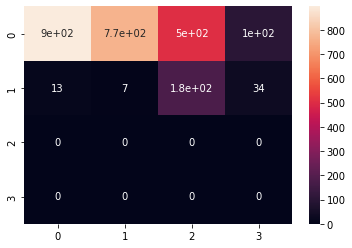

In [269]:
# Presentamos de forma estetica la matriz de confución
sns.heatmap(confusion_matrix(y, y_pred_FL), annot=True)

In [270]:
# Obtenemos f1-score del modelo Fuzzy Logic
FL_accuracy_score = accuracy_score(y, y_pred_FL)
# Mostramos la exactitud
FL_accuracy_score

0.3616

In [271]:
# Obtenemos el recall del modelo Fuzzy Logic
FL_recall_score = recall_score(y, y_pred_FL, average=None)
# Mostramos la exahustividad 
FL_recall_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.39532834, 0.03030303, 0.        , 0.        ])

In [272]:
# Obtenemos la precisión del modelo Fuzzy Logic
FL_precision_score = precision_score(y, y_pred_FL, average=None)
# Mostramos la presición
FL_precision_score

array([0.98571429, 0.00904393, 0.        , 0.        ])

In [273]:
# Obtenemos f1-score del modelo Fuzzy Logic
FL_f1_score = f1_score(y, y_pred_FL, average=None)
# Mostramos fi-score
FL_f1_score

array([0.56432841, 0.01393035, 0.        , 0.        ])

**Graficas**

In [274]:
# Establecemos el rango de acción de las variables de entrada
diametro_min = ctrl.Antecedent(np.arange(0.001058,5.230642, 1), 'diametro_min')
# Establecemos el rango de acción de las variables de entrada
diametro_max = ctrl.Antecedent(np.arange(0.002366,11.696071, 1), 'diametro_max')
# Establecemos el rango de acción de las variables de entrada
miss_distance = ctrl.Antecedent(np.arange(2.6199,7.4795, 1), 'miss_distance')
# Establecemos el rango de acción de las variables de entrada
#relative_velocity = ctrl.Antecedent(np.arange(882.96,207168.66, 1), 'relative_velocity')
# Establecemos el rango de acción de las variables de entrada
absolute_magnitude = ctrl.Antecedent(np.arange(13.53,32, 1), 'absolute_magnitude')
# Establecemos el rango de acción de las variables de entrada
hazardous = ctrl.Consequent(np.arange(0,1, 1), 'hazardous')

In [275]:
#Le damos 3 rango al valor del diametro minimo
diametro_min.automf(3)
#Le damos 3 rango al valor del diametro maximo
diametro_max.automf(3)
#Le damos 3 rango al valor de la distancia
miss_distance.automf(3)
#Le damos 3 rango al valor de la distancia
#relative_velocity.automf(3)
#Le damos 3 rango al valor de la magnitud absoluta
absolute_magnitude.automf(3)


# le damos los valores a la variable objetivo
hazardous['risk_hazardous_low'] = fuzz.trimf(hazardous.universe, [0,0,1])
hazardous['risk_hazardous_medium'] = fuzz.trimf(hazardous.universe, [0,1,1])
hazardous['risk_hazardous_high'] = fuzz.trimf(hazardous.universe, [1,1,1])

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


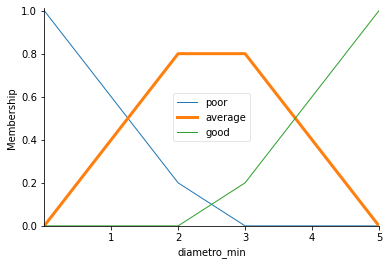

In [276]:
diametro_min['average'].view()

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


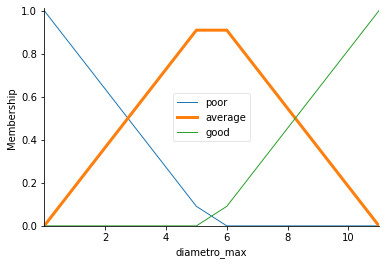

In [277]:
diametro_max['average'].view()

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


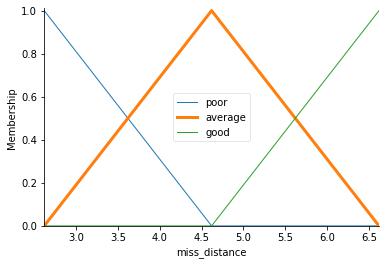

In [278]:
miss_distance['average'].view()

In [279]:
relative_velocity['average'].view()

NameError: name 'relative_velocity' is not defined

In [ ]:
absolute_magnitude['average'].view()

**Grafo de la primera regla**

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

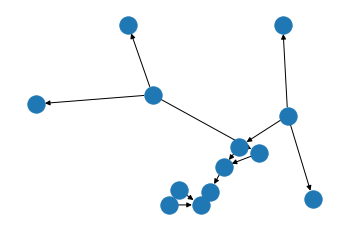

In [280]:
#inferir las reglas difusas que se aplican al modelo 
rule1 = ctrl.Rule(diametro_min['poor'] | diametro_max['poor'], hazardous['risk_hazardous_low'])
rule2 = ctrl.Rule(diametro_min['average'] & diametro_max['good']  , hazardous['risk_hazardous_medium'])
rule3 = ctrl.Rule(diametro_min['good']  | absolute_magnitude['good'] |miss_distance['good'], hazardous['risk_hazardous_high'])
#imprime el grafo
rule1.view()

# Gráfica comparativa de los modelos

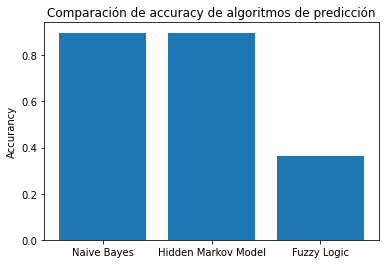

In [281]:
#Definimos una la lista con los titulos del primer conjunto
NB = ["Naive Bayes", "Hidden Markov Model", "Fuzzy Logic"]
#Definimos una lista con las estadisticas del modelo de Naive Bayes
estadisticas_NB = [NB_accuracy_score, HMM_accuracy_score, FL_accuracy_score]

fig, ax = plt.subplots()
#Colocamos una etiqueta en el eje Y
ax.set_ylabel('Accurancy')
#Colocamos una etiqueta en el eje X
ax.set_title('Comparación de accuracy de algoritmos de predicción')
#Creamos la grafica de barras utilizando 'paises' como eje X y 'ventas' como eje y.
plt.bar(NB, estadisticas_NB)
plt.savefig('barras_simple.png')
#Finalmente mostramos la grafica con el metodo show()
plt.show()

# Evaluación de los modelos

# Naive Bayes

A lo largo de las diferentes pruebas que se realizo a lo largo del desarrollo del notebook, este algoritmo se destaco por ser el más estable logrando una exactitud superior a 80% con el ajuste realizado a los datos de entrenamiento. Los datos se adaptan facilmente a este modelo, al no necesitar un amplio tratamiento en los datos para que se obtenga un resultado favorable, como en este caso logrando una exactitud del 89.8% en sus preducciones.

# Hidden Markov Model
Para el desarrollo de este modelo es importante hacer un muestreo apropiado para que el modelo aprenda las caracteristicas suficientes para realizar una predicción con una exactitud favorable. Este modelo requiere de una data con valor para predecir debidamente si un asteroide es peligroso o no. Para que este modelo logre una exactitud del 89.8% y una presición del 89.8% en sus predicciones, unicamente se requirio hacer una selección debida de las caracteristicas y un ajuste a los datos a través de Min-Max Scaler.

# Fussy Logic

Para este problema de clasificación binaria el utilizar Fussy logic no resulto favorable, logro obtener una exactitud del 36.16% y una presición del 98.57%. Para este modelo se tubo que aplicar Standarization para normalizar las caracteristicas numéricas y lograr el resultado obtenido.
